In [21]:
#读取数据
from sklearn.externals.joblib import Memory 
from sklearn.datasets import load_svmlight_file 
import numpy as np

def get_data():
    data = load_svmlight_file("australian_scale")
    return data[0],data[1]

data_x,data_y = get_data()

In [22]:
#切分数据
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.33,random_state=42)

y_train = np.mat(y_train).T
y_test = np.mat(y_test).T

In [23]:
#初始化
w = np.mat(np.random.random([x_train.shape[1],1]))
b = np.random.random()

In [24]:
import matplotlib.pyplot as plt

m_train = x_train.shape[0]
m_test = x_test.shape[0]
Loss_train = []
Loss_test = []
x = []
for n in range(1,50):
    x.append(n)
    G_w = np.zeros([x_train.shape[1],1])
    G_b = 0
    C =100000

    for n in range(0,m_train):
        result = 1 - y_train[n]*(w.T*x_train[n].T+b)
        
        if(result>=0):
            G_w = G_w + (w-C*x_train[n].T*y_train[n])
            G_b = G_b + (-C*y_train[n])

        elif(result<0):
            G_w = G_w + (w)
            G_b = G_b
            
    D_w = -G_w
    D_b = -G_b

    learn_rate = 0.00000001

    w = w + learn_rate*D_w
    b = b + learn_rate*D_b

    yu = 0

    Loss_test_sum = 0
    fore = []
    for n in range(0,m_test):
        result = w.T*x_test[n].T+b
        if(result>=0):
            fore.append(1)

        elif(result<0):
            fore.append(-1)
    
    r = 0
    for n in range(1,m_test):
        if(fore[n]==y_test[n]):
            r = r+1
        else:
            r = r
    
    Loss_test.append(r/m_test)



x = x
y = Loss_test

print(w,w.T*w)


[[-0.02762012]
 [-0.10836609]
 [ 0.13151828]
 [ 0.7277559 ]
 [ 0.6674033 ]
 [ 0.34954514]
 [ 0.35301247]
 [ 1.19494157]
 [ 0.21038549]
 [ 0.40865992]
 [-0.04138259]
 [ 0.2057826 ]
 [-0.18120889]
 [ 0.03804752]] [[ 2.96915217]]


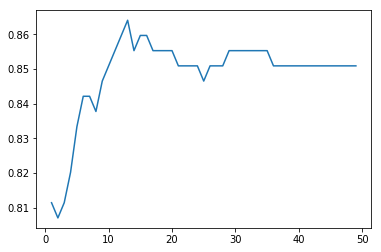

In [25]:
plt.plot(x, y)
plt.show()